In [21]:
import numpy as np
import pandas as pd
import ast
from sentence_transformers import util
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score



In [2]:
human = pd.read_csv('human_artificial_minilm_openai_embeddings_symmetry.csv')


In [3]:
human

,x,y,z,score,incomprehensibleMarkings,offensiveMarkings,average_score,emb_minilm_x,emb_minilm_y,emb_minilm_z,...,minilm_x-y,minilm_comparison,minilm_obviousness,minilm_compatibility,diff_openai_xz-z_yz-z,openai_symmetry,openai_x-y,openai_comparison,openai_obviousness,openai_compatibility
0,men,McDonalds,cheap with a toy on the side,"[1,2,2,2,2,2,3,3,3,3,4,4,4,4,5,5,5,5,5]",0,1,3.368421,"[-0.04805279150605202, 0.0446431003510952, -0....","[-0.03200775384902954, -0.06043137609958649, 0...","[-0.033495958894491196, 0.05692833289504051, 0...",...,0.298805,0.611392,0.082095,0.178571,0.091851,0.090680,0.194741,0.685940,0.152396,0.243075
1,women,coffee,"black, bitter and preferably fair trade","[1,2,2,3,3,3,3,3,4,4,4,4,4,5,5]",0,1,3.333333,"[0.007278132252395153, -0.020804431289434433, ...","[-0.03095192275941372, 0.018730182200670242, 0...","[-0.0547354631125927, -0.021777495741844177, -...",...,0.285485,0.657213,0.155800,0.263621,0.000820,0.174542,0.298331,0.730552,0.213098,0.387640
2,home,evenings,filled with loneliness and depressing memories,"[1,1,1,1,1,1,2,2,2,3,3,4,4,4,4]",0,1,2.266667,"[0.040955815464258194, 0.019688254222273827, -...","[0.029451437294483185, 0.0035307053476572037, ...","[-0.00421473802998662, -0.010743106715381145, ...",...,0.383437,0.809421,0.239771,0.260619,0.065450,0.038548,0.327584,0.744711,0.224293,0.262842
3,women,dendrites,ready to receive my transmission,"[1,1,1,1,1,1,1,1,2,2,4,4,4,4,5,5,5,5,5,5]",1,0,2.900000,"[0.007278132252395153, -0.020804431289434433, ...","[-0.015804383903741837, -0.06684033572673798, ...","[-0.045801229774951935, 0.004314403515309095, ...",...,0.211909,0.565945,0.099090,0.048441,0.063287,0.000798,0.151997,0.600607,0.193376,0.192578
4,boyfriends,adventure movies,a little rough with a happy ending,"[1,1,2,2,2,2,2,3,3,3,3,3,4,4,4,4,4,5,5,5,5,5,5,5]",0,0,3.416667,"[-0.04999513551592827, 0.014507962390780449, 0...","[-0.02072649821639061, 0.01930876262485981, -0...","[-0.01790904439985752, 0.01793697476387024, 0....",...,0.194879,0.576621,0.099360,0.303473,0.092311,0.029045,0.177640,0.603342,0.266726,0.237681
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
516,boobs,government,big,"[1,2,2,2,2,2,2,2,3,3,3,5]",0,1,2.416667,"[0.013195332139730453, 0.0026167789474129677, ...","[-0.06136007606983185, 0.042866308242082596, 0...","[0.02561303973197937, 0.053659114986658096, -0...",...,0.371278,0.463316,0.351782,0.316956,0.188377,0.091662,0.222816,0.268863,0.427593,0.335931
517,relationships,reality tv shows,hugely entertaining but too embarrassing to ta...,"[1,1,1,2,2,2,2,2,3,3,3,3,3,3,3,4,4,4,4,4,4,4,5,5]",0,0,3.000000,"[-0.044962115585803986, 0.05694946274161339, -...","[-0.049706775695085526, -0.08171508461236954, ...","[-0.018775230273604393, -0.0027690064162015915...",...,0.170234,0.584878,0.090019,0.220943,0.120865,0.086199,0.251562,0.746720,0.169903,0.256101
518,people,back,hurt,"[1,1,1,1,1,1,2,2,2,3,3,3,4,4,4]",0,1,2.200000,"[-0.03228759765625, 0.02854936756193638, -0.02...","[-0.02990780957043171, -0.016124438494443893, ...","[-0.0393325537443161, 0.0007160977693274617, 0...",...,0.298473,0.507613,0.291882,0.439503,0.213428,0.013230,0.311768,0.520006,0.298270,0.285039
519,women,tool kits,useful for screwing or hitting,"[1,1,1,1,1,2,2,2,2,3,3,3,3,3,3,3,4,4,4,4,4,4,5]",1,0,2.739130,"[0.007278132252395153, -0.020804431289434433, ...","[-0.0945926234126091, 0.02964070998132229, -0....","[-0.04071880131959915, 0.08163653314113617, 0....",...,0.152875,0.420806,0.083086,0.334897,0.036788,0.161977,0.192333,0.602171,0.182024,0.344001


### The number of ratings for each joke

In [4]:
lengths = human['score'].apply(ast.literal_eval).apply(len)

# Find minimum and maximum lengths
min_length = lengths.min()
max_length = lengths.max()

print("Shortest vector length:", min_length)
print("Longest vector length:", max_length)

Shortest vector length: 4
Longest vector length: 57


In [5]:
human[human['average_score'] >= 3.5]

,x,y,z,score,incomprehensibleMarkings,offensiveMarkings,average_score,emb_minilm_x,emb_minilm_y,emb_minilm_z,...,minilm_x-y,minilm_comparison,minilm_obviousness,minilm_compatibility,diff_openai_xz-z_yz-z,openai_symmetry,openai_x-y,openai_comparison,openai_obviousness,openai_compatibility
9,men,books,bound in leather,"[1,2,2,2,3,3,3,3,3,3,3,3,4,4,4,4,5,5,5,5,5,5,5,5]",0,0,3.625000,"[-0.04805279150605202, 0.0446431003510952, -0....","[-0.028229668736457825, -0.00401812419295311, ...","[0.0074460310861468315, 0.12628516554832458, 0...",...,0.298125,0.644733,0.221700,0.190720,0.065189,0.110057,0.264416,0.603938,0.235129,0.345186
16,Japanese tourists,money,put away abroad,"[2,2,3,3,3,3,4,4,5,5,5,5]",0,0,3.666667,"[0.013404890894889832, 0.0184461809694767, -0....","[-0.08630542457103729, 0.12098502367734909, -0...","[0.03824795037508011, 0.03769596666097641, -0....",...,0.156711,0.507895,0.248066,0.230962,0.023980,0.076708,0.234098,0.557316,0.335522,0.258814
37,partners,brownies,without nuts,"[1,2,2,2,3,3,3,3,3,4,4,4,4,4,4,4,5,5,5,5]",1,0,3.500000,"[-0.019465908408164978, 0.008671289309859276, ...","[-0.016738615930080414, -0.037788428366184235,...","[0.009993750602006912, 0.06529338657855988, 0....",...,0.211410,0.529002,0.207119,0.263725,0.025039,0.200232,0.214506,0.544564,0.213594,0.413826
59,president,coffee,physically unable to tweet.,"[1,1,1,1,1,2,2,3,3,4,4,4,4,4,4,4,5,5,5,5,5,5,5...",0,0,3.520000,"[-0.054848574101924896, 0.07214371860027313, 0...","[-0.03095192275941372, 0.018730182200670242, 0...","[0.04548676684498787, -0.010330626741051674, 0...",...,0.331182,0.646919,0.116872,0.081373,0.116770,0.021923,0.208668,0.618778,0.151086,0.173009
73,women,square roots,"if they're under 16, I do them in my head","[1,2,2,2,2,3,4,4,4,4,5,5,5,5,5,5,5]",0,1,3.705882,"[0.007278132252395153, -0.020804431289434433, ...","[0.01186471339315176, 0.03935660049319267, 0.0...","[-0.01756926253437996, 0.054038457572460175, -...",...,0.165459,0.489550,0.160856,-0.017311,0.137700,0.065620,0.225111,0.673622,0.253676,0.188056
80,compliments,jokes,I don't get them,"[1,1,2,2,2,2,2,3,3,3,3,4,4,4,4,4,5,5,5,5,5,5,5,5]",0,0,3.500000,"[-0.12746140360832214, 0.10546218603849411, 0....","[0.01859264075756073, -0.001625871635042131, 0...","[-0.10592962056398392, -0.0009616485913284123,...",...,0.331091,0.519165,0.279352,0.406513,0.059590,0.073468,0.415883,0.586036,0.190915,0.264383
97,chickens,eggs,suspended in a state of philosophical inquiry,"[1,1,1,1,3,3,3,3,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4...",1,0,3.750000,"[0.013746162876486778, -0.030027173459529877, ...","[-0.03691296651959419, 0.031358249485492706, -...","[-0.03419427201151848, 0.022061288356781006, -...",...,0.638623,0.784358,0.090567,0.111829,0.041536,0.011936,0.576764,0.760942,0.124677,0.112741
99,lovers,soldiers,well-trained and slow to shoot,"[3,3,4,4,4,4,5]",1,0,3.857143,"[-0.07183711975812912, 0.029638614505529404, 0...","[-0.060161832720041275, 0.01872325874865055, -...","[0.04634511470794678, 0.030099226161837578, -0...",...,0.339013,0.649413,0.137837,0.285034,0.073310,0.042652,0.340432,0.702927,0.228598,0.271250
116,women,ambulances,coming very quickly and loudly,"[2,3,4,4,4,4,5,5,5,5,5,5]",0,0,4.250000,"[0.007278132252395153, -0.020804431289434433, ...","[-0.012068158946931362, 0.0527624785900116, -0...","[0.06302465498447418, -0.013483259826898575, 0...",...,0.339478,0.593622,0.145803,0.228633,0.022809,0.081772,0.223389,0.530813,0.135812,0.217585
129,sex life,novels,entirely fictional,"[2,2,2,3,3,3,3,3,3,4,4,4,4,4,4,5,5,5,5,5]",1,0,3.650000,"[-0.07230959087610245, 0.05950522795319557, -0...","[-0.029095841571688652, -0.028517425060272217,...","[-0.03977418318390846, -0.00046377646503970027...",...,0.301205,0.596911,0.233666,0.420357,0.155063,0.203513,0.224707,0.572170,0.162296,0.365809


### Assign the most common rating (mode)

In [6]:
from collections import Counter

def mode_rating_highest(ratings):
    if not ratings:
        return None
    count = Counter(ast.literal_eval(ratings))
    max_freq = max(count.values())
    modes = [rating for rating, freq in count.items() if freq == max_freq]
    return max(modes)  # highest rating among the tied modes

def mode_rating_lowest(ratings):
    if not ratings:
        return None
    count = Counter(ast.literal_eval(ratings))
    max_freq = max(count.values())
    modes = [rating for rating, freq in count.items() if freq == max_freq]
    return min(modes)

In [7]:
human['most_frequent_score'] = human['score'].apply(mode_rating_highest)
class_counts = human['most_frequent_score'].value_counts()
print(class_counts)

most_frequent_score
2    171
3    131
1     95
4     93
5     31
Name: count, dtype: int64


### The number of jokes for each class

### check the dataset

In [8]:
for i in range(1):
    x = human.x[i]
    y = human.y[i]
    z = human.z[i]
    xz = human.x[i] + " " + human.z[i]
    yz = human.y[i] + " " + human.z[i]
    xyz = "I like my " + human.x[i] + " like I like my " + human.y[i] + ", " + human.z[i]

    print ("x:", x)
    print ("y:", y)
    print ("z:", z)
    print ("xz:", xz)
    print ("yz:", yz)
    print ("xyz:", xyz)

x: men
y: McDonalds
z: cheap with a toy on the side
xz: men cheap with a toy on the side
yz: McDonalds cheap with a toy on the side
xyz: I like my men like I like my McDonalds, cheap with a toy on the side


In [9]:
'''
COLUMN NUMBERS:
x - 0
y - 1
z - 2
score - 3
incomprehensibleMarkings - 4
offensiveMarkings - 5
average_score  - 6
emb_openai_x   - 7
emb_openai_y   - 8	
emb_openai_z   - 9
emb_openai_xz  - 10
emb_openai_yz  - 11	
emb_openai_xyz - 12
'''



'\nCOLUMN NUMBERS:\nx - 0\ny - 1\nz - 2\nscore - 3\nincomprehensibleMarkings - 4\noffensiveMarkings - 5\naverage_score  - 6\nemb_openai_x   - 7\nemb_openai_y   - 8\t\nemb_openai_z   - 9\nemb_openai_xz  - 10\nemb_openai_yz  - 11\t\nemb_openai_xyz - 12\n'

In [22]:
def metrics (y_true, y_predicted):
    accuracy = accuracy_score(y_true, y_predicted)
    print("Accuracy: ", accuracy)
    precision = precision_score(y_true, y_predicted, average='weighted')
    print("Précision: ", precision)
    recall = recall_score(y_true, y_predicted, average='weighted')
    print("Recall: ", recall)
    f1 = f1_score(y_true, y_predicted, average='weighted')
    print("F1-score: ", f1)
    conf_mat = confusion_matrix(y_true, y_predicted, normalize='all')
    print("Confusion Matrix:\n", conf_mat)



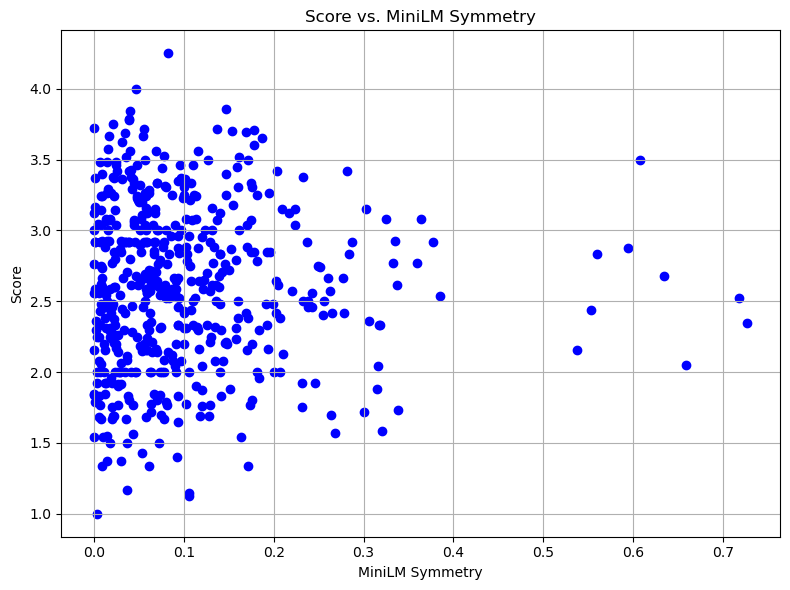

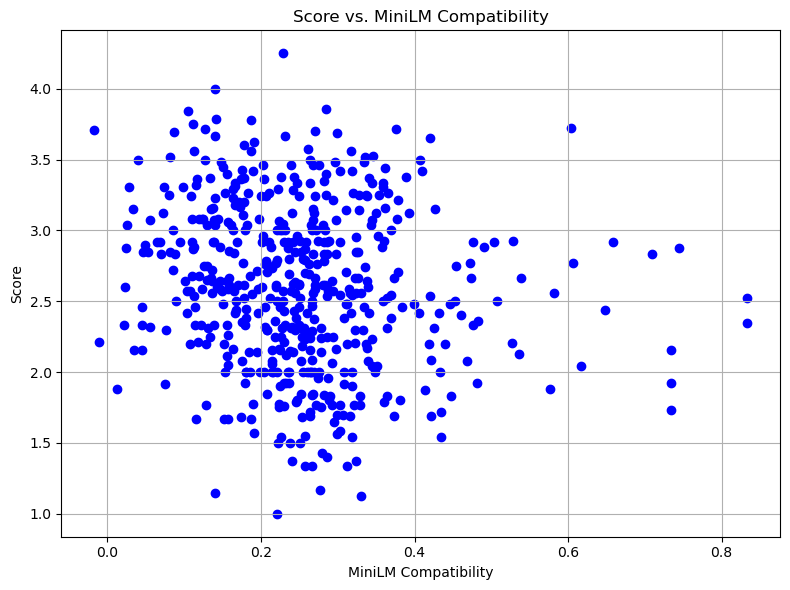

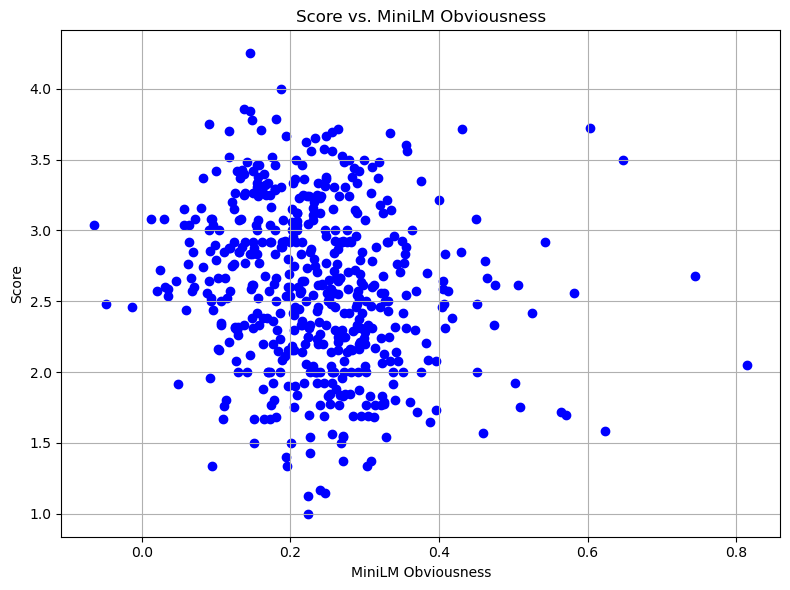

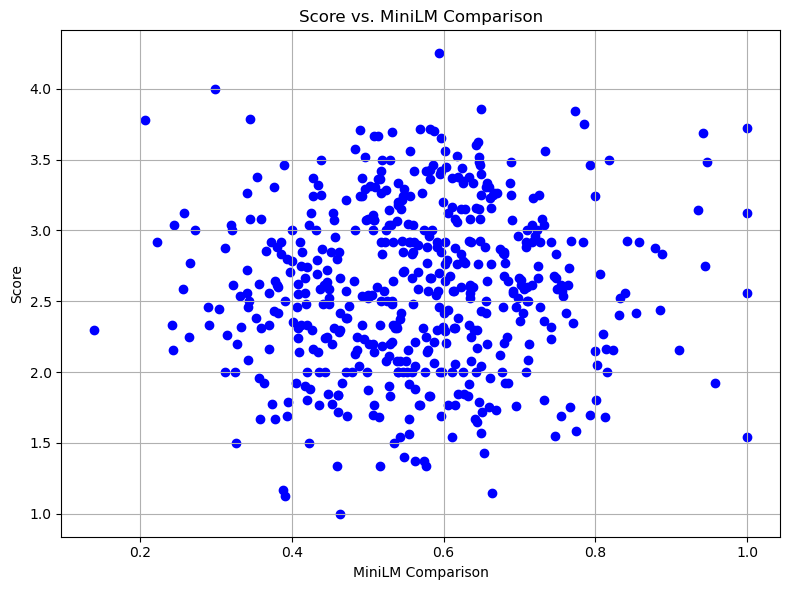

In [23]:

plt.figure(figsize=(8, 6))
plt.scatter(human['minilm_symmetry'], human['average_score'], color='blue')
plt.xlabel('MiniLM Symmetry')
plt.ylabel('Score')
plt.title('Score vs. MiniLM Symmetry')
plt.grid(True)
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 6))
plt.scatter(human['minilm_compatibility'], human['average_score'], color='blue')
plt.xlabel('MiniLM Compatibility')
plt.ylabel('Score')
plt.title('Score vs. MiniLM Compatibility')
plt.grid(True)
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 6))
plt.scatter(human['minilm_obviousness'], human['average_score'], color='blue')
plt.xlabel('MiniLM Obviousness')
plt.ylabel('Score')
plt.title('Score vs. MiniLM Obviousness')
plt.grid(True)
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 6))
plt.scatter(human['minilm_comparison'], human['average_score'], color='blue')
plt.xlabel('MiniLM Comparison')
plt.ylabel('Score')
plt.title('Score vs. MiniLM Comparison')
plt.grid(True)
plt.tight_layout()
plt.show()


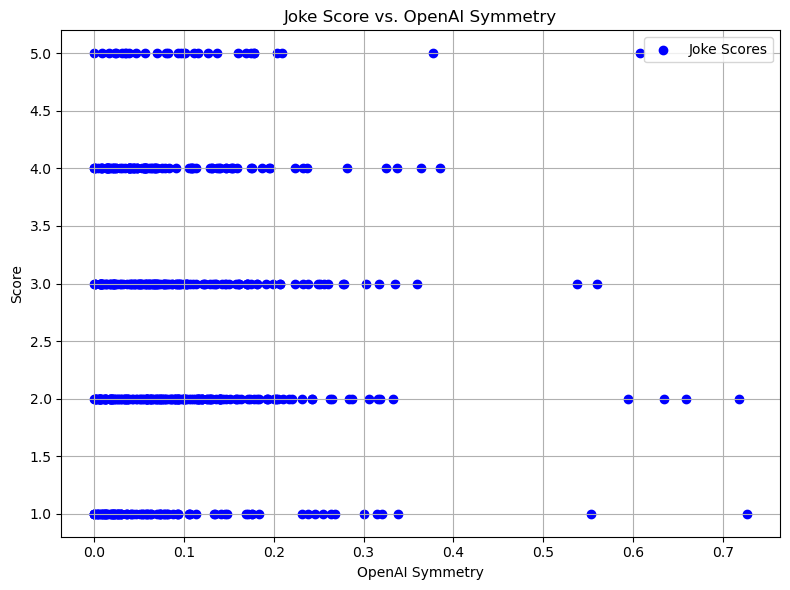

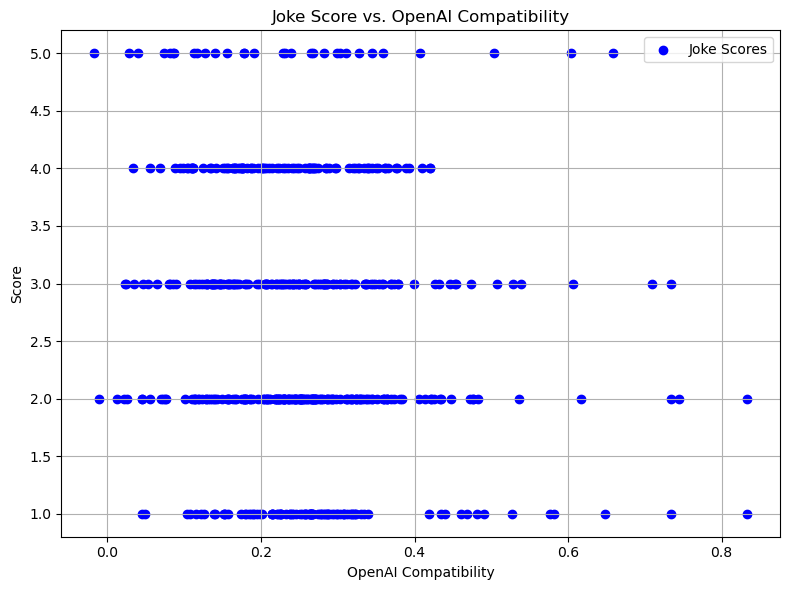

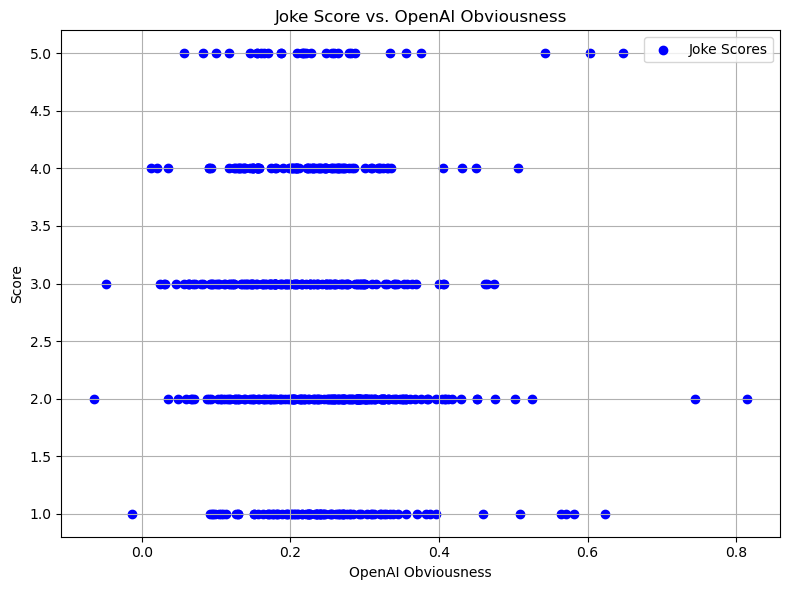

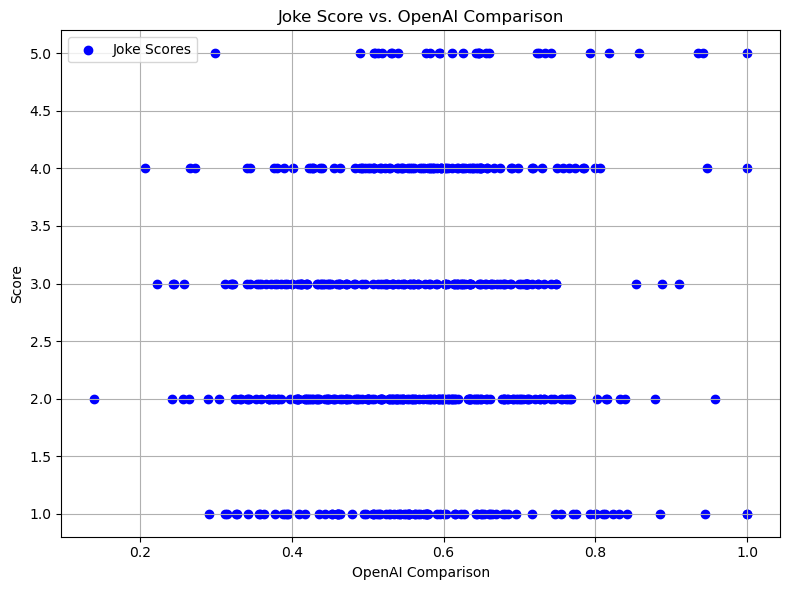

In [24]:

plt.figure(figsize=(8, 6))
plt.scatter(human['minilm_symmetry'], human['most_frequent_score'], color='blue', label='Joke Scores')
plt.xlabel('OpenAI Symmetry')
plt.ylabel('Score')
plt.title('Joke Score vs. OpenAI Symmetry')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 6))
plt.scatter(human['minilm_compatibility'], human['most_frequent_score'], color='blue', label='Joke Scores')
plt.xlabel('OpenAI Compatibility')
plt.ylabel('Score')
plt.title('Joke Score vs. OpenAI Compatibility')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 6))
plt.scatter(human['minilm_obviousness'], human['most_frequent_score'], color='blue', label='Joke Scores')
plt.xlabel('OpenAI Obviousness')
plt.ylabel('Score')
plt.title('Joke Score vs. OpenAI Obviousness')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 6))
plt.scatter(human['minilm_comparison'], human['most_frequent_score'], color='blue', label='Joke Scores')
plt.xlabel('OpenAI Comparison')
plt.ylabel('Score')
plt.title('Joke Score vs. OpenAI Comparison')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


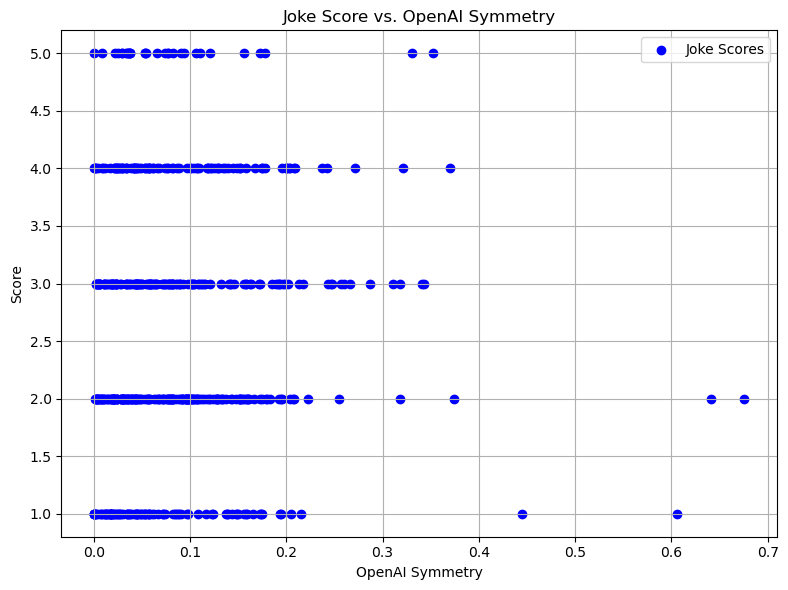

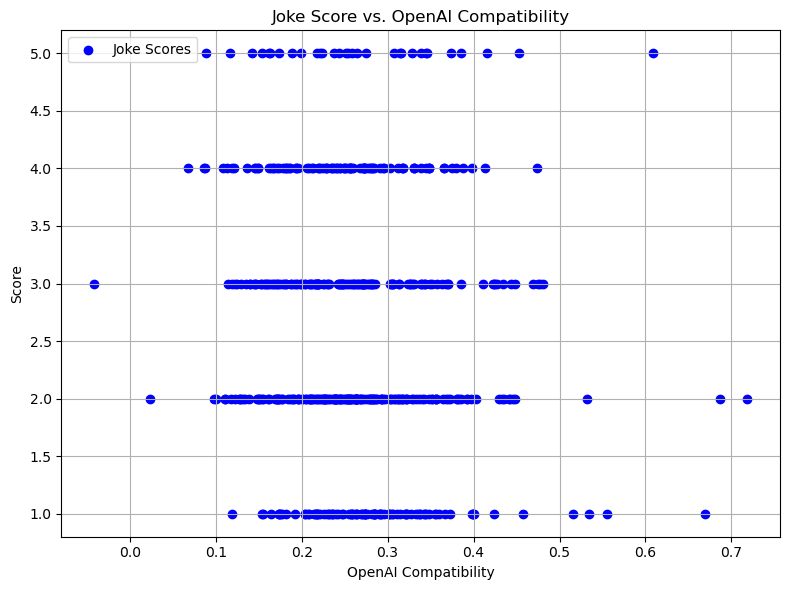

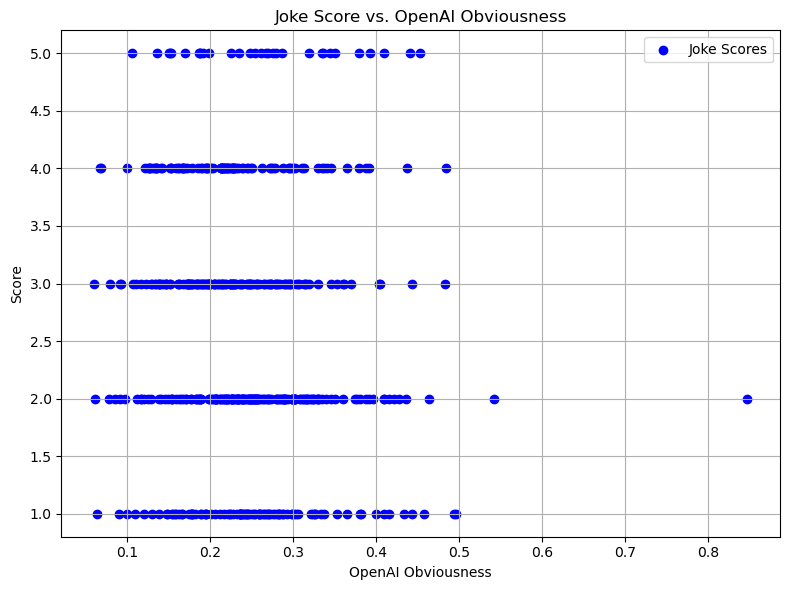

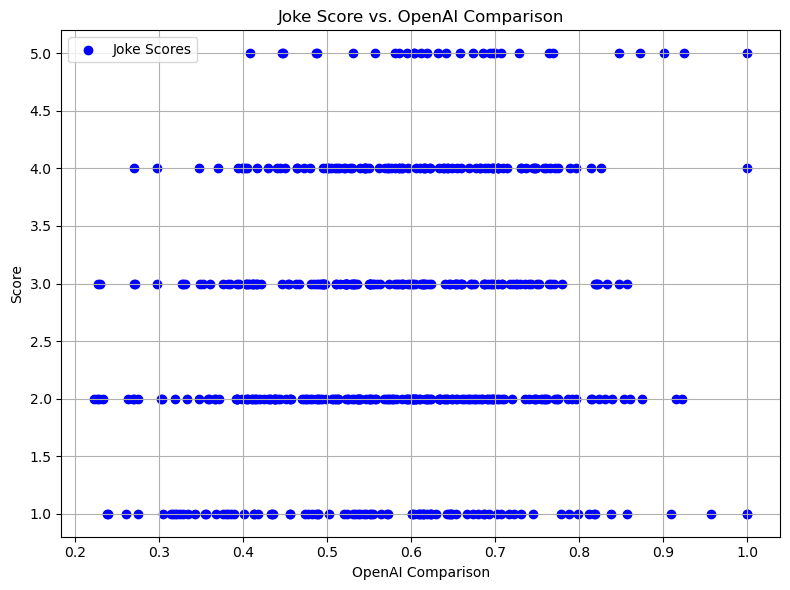

In [25]:

plt.figure(figsize=(8, 6))
plt.scatter(human['openai_symmetry'], human['most_frequent_score'], color='blue', label='Joke Scores')
plt.xlabel('OpenAI Symmetry')
plt.ylabel('Score')
plt.title('Joke Score vs. OpenAI Symmetry')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 6))
plt.scatter(human['openai_compatibility'], human['most_frequent_score'], color='blue', label='Joke Scores')
plt.xlabel('OpenAI Compatibility')
plt.ylabel('Score')
plt.title('Joke Score vs. OpenAI Compatibility')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 6))
plt.scatter(human['openai_obviousness'], human['most_frequent_score'], color='blue', label='Joke Scores')
plt.xlabel('OpenAI Obviousness')
plt.ylabel('Score')
plt.title('Joke Score vs. OpenAI Obviousness')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 6))
plt.scatter(human['openai_comparison'], human['most_frequent_score'], color='blue', label='Joke Scores')
plt.xlabel('OpenAI Comparison')
plt.ylabel('Score')
plt.title('Joke Score vs. OpenAI Comparison')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


# =========================
# <U>MINILM
# =========================

### Prepare the data

In [26]:
subset_df = human[['minilm_symmetry', 'minilm_compatibility', 'minilm_obviousness', 'minilm_comparison', 'most_frequent_score']].copy()

data = subset_df[['minilm_symmetry', 'minilm_compatibility', 'minilm_obviousness', 'minilm_comparison']] #0.615 0.628
#data = subset_df[['diff_minilm_xz-z_yz-z', 'diff_minilm_x-z_y-z', 'minilm_x-y', 'minilm_xz-yz', 'minilm_x-z']] # 0.679 0.524
#data = subset_df[['diff_minilm_xz-z_yz-z', 'diff_minilm_x-z_y-z', 'minilm_x-y', 'minilm_xz-yz']] # 0.632 0.467
#data = subset_df[['diff_minilm_xz-z_yz-z', 'diff_minilm_x-z_y-z', 'minilm_x-y']] # 0.625 0.457
#data = subset_df[['minilm_x-y', 'minilm_xz-yz', 'minilm_x-z', 'minilm_y-z']] # 0.632 0.590

target = subset_df['most_frequent_score']
#target = subset_df['most_frequent_score']

x_train, x_test, y_train, y_test = train_test_split(data, target, test_size=0.3, shuffle=True, random_state=40)


In [27]:

# Check the distribution of classes in y_train
class_counts = y_train.value_counts()
print(class_counts)

most_frequent_score
2    117
3     88
4     70
1     68
5     21
Name: count, dtype: int64


In [28]:

# Check the distribution of classes in y_train
class_counts = y_test.value_counts()
print(class_counts)

most_frequent_score
2    54
3    43
1    27
4    23
5    10
Name: count, dtype: int64


### Naive Bayes

In [29]:
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
clf.fit(x_train, y_train)
plt.show()

y_pred_train = clf.predict(x_train)
metrics(y_train, y_pred_train)
print()
y_pred_test = clf.predict(x_test)
metrics(y_test, y_pred_test)



Accuracy:  0.35714285714285715
Précision:  0.32756229855197955
Recall:  0.35714285714285715
F1-score:  0.3129481552260324
Confusion Matrix:
 [[0.00549451 0.10164835 0.01373626 0.04945055 0.01648352]
 [0.00824176 0.20054945 0.03296703 0.06868132 0.01098901]
 [0.00549451 0.11263736 0.0467033  0.06868132 0.00824176]
 [0.00824176 0.06318681 0.01373626 0.0989011  0.00824176]
 [0.00824176 0.01648352 0.00549451 0.02197802 0.00549451]]

Accuracy:  0.31210191082802546
Précision:  0.2979043249743887
Recall:  0.31210191082802546
F1-score:  0.2877810974057712
Confusion Matrix:
 [[0.00636943 0.08917197 0.01910828 0.04458599 0.01273885]
 [0.02547771 0.17834395 0.05732484 0.06369427 0.01910828]
 [0.01273885 0.13375796 0.07006369 0.05732484 0.        ]
 [0.         0.07643312 0.01910828 0.05095541 0.        ]
 [0.         0.01273885 0.01273885 0.03184713 0.00636943]]


### SVM

In [30]:
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
clf = SVC(kernel='linear', C=1.0, gamma='scale')  # You can change kernel to 'rbf', 'linear', 'poly', or 'sigmoid'
clf.fit(x_train, y_train)
plt.show()

y_pred_train = clf.predict(x_train)
metrics(y_train, y_pred_train)
print()
y_pred_test = clf.predict(x_test)
metrics(y_test, y_pred_test)



Accuracy:  0.32142857142857145
Précision:  0.10331632653061226
Recall:  0.32142857142857145
F1-score:  0.15637065637065636
Confusion Matrix:
 [[0.         0.18681319 0.         0.         0.        ]
 [0.         0.32142857 0.         0.         0.        ]
 [0.         0.24175824 0.         0.         0.        ]
 [0.         0.19230769 0.         0.         0.        ]
 [0.         0.05769231 0.         0.         0.        ]]

Accuracy:  0.34394904458598724
Précision:  0.11830094527161346
Recall:  0.34394904458598724
F1-score:  0.17604974793974704
Confusion Matrix:
 [[0.         0.17197452 0.         0.         0.        ]
 [0.         0.34394904 0.         0.         0.        ]
 [0.         0.27388535 0.         0.         0.        ]
 [0.         0.14649682 0.         0.         0.        ]
 [0.         0.06369427 0.         0.         0.        ]]


/opt/miniconda3/envs/humour/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/miniconda3/envs/humour/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


# Decision tree

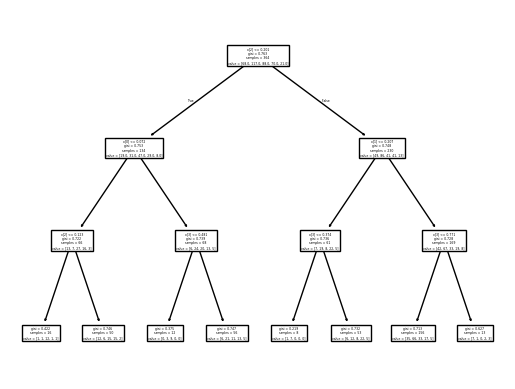

Accuracy:  0.4368131868131868
Précision:  0.42933593982215174
Recall:  0.4368131868131868
F1-score:  0.3852539593369309
Confusion Matrix:
 [[0.01923077 0.11538462 0.03571429 0.01648352 0.        ]
 [0.00274725 0.25824176 0.02747253 0.03296703 0.        ]
 [0.         0.12087912 0.0989011  0.02197802 0.        ]
 [0.00549451 0.08241758 0.04395604 0.06043956 0.        ]
 [0.00824176 0.02747253 0.00824176 0.01373626 0.        ]]

Accuracy:  0.3375796178343949
Précision:  0.2960634906494779
Recall:  0.3375796178343949
F1-score:  0.27874481722430267
Confusion Matrix:
 [[0.00636943 0.10828025 0.03821656 0.01910828 0.        ]
 [0.         0.24840764 0.03821656 0.05732484 0.        ]
 [0.         0.17834395 0.06369427 0.03184713 0.        ]
 [0.00636943 0.10191083 0.01910828 0.01910828 0.        ]
 [0.01273885 0.03184713 0.00636943 0.01273885 0.        ]]


/home/digit/miniconda3/envs/humour/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/digit/miniconda3/envs/humour/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [101]:
clf = DecisionTreeClassifier(max_depth=3)
clf.fit(x_train, y_train)
plot_tree(clf)
plt.show()

y_pred_train = clf.predict(x_train)
metrics(y_train, y_pred_train)
print()
y_pred_test = clf.predict(x_test)
metrics(y_test, y_pred_test)


# search best random forest

Best parameters: {'max_depth': 20, 'min_samples_split': 35, 'n_estimators': 20}
Best cross-validated accuracy: 0.3680745814307458


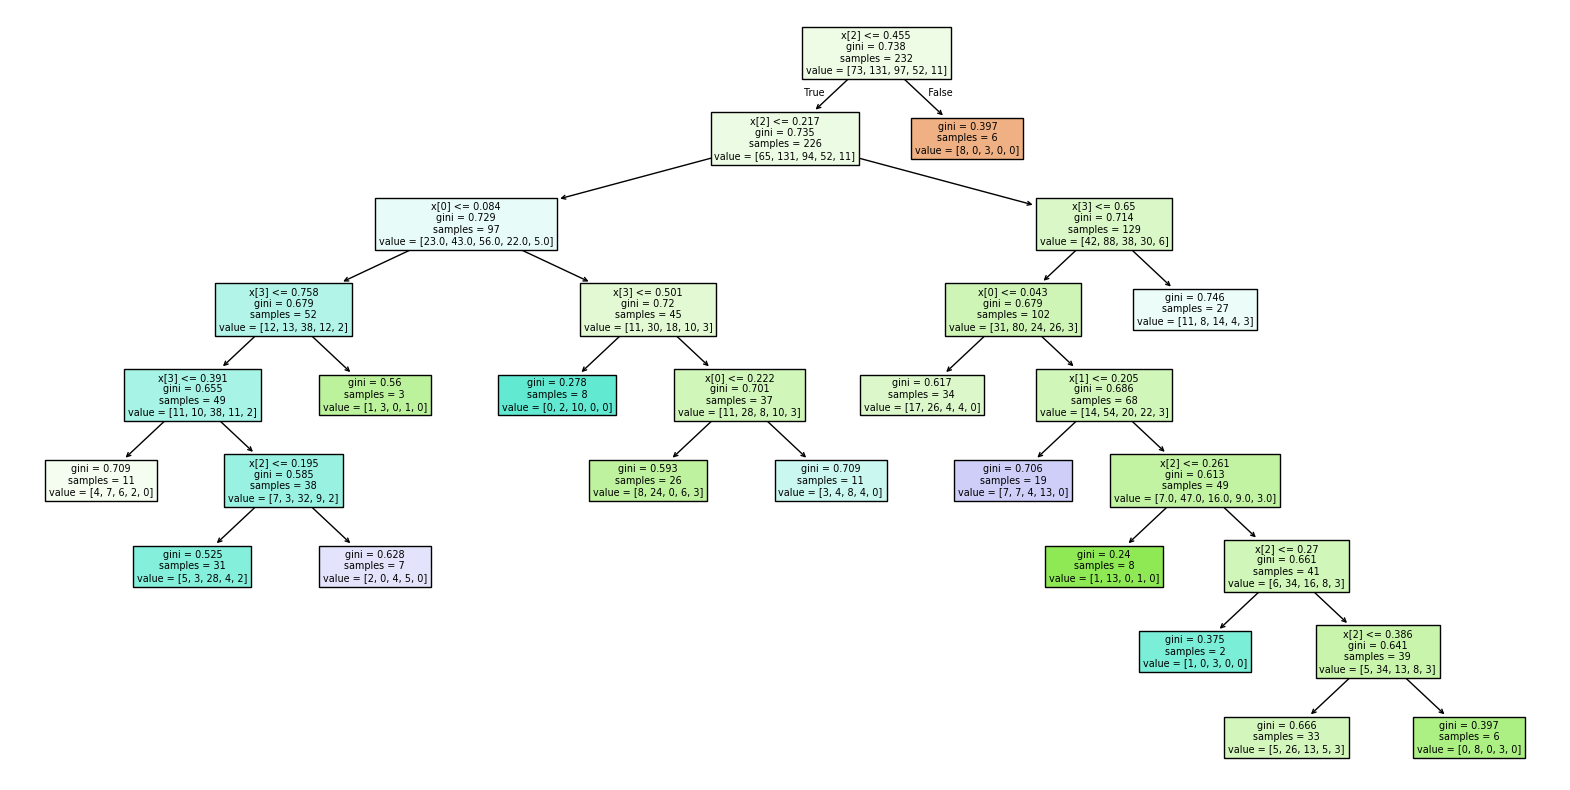

Accuracy:  0.5576923076923077
Précision:  0.6083863591794855
Recall:  0.5576923076923077
F1-score:  0.5318010351136307
Confusion Matrix:
 [[0.07692308 0.06593407 0.03296703 0.01098901 0.        ]
 [0.00824176 0.27197802 0.03021978 0.01098901 0.        ]
 [0.00549451 0.09065934 0.14010989 0.00549451 0.        ]
 [0.01923077 0.07967033 0.03021978 0.06318681 0.        ]
 [0.01098901 0.02747253 0.01098901 0.00274725 0.00549451]]

Accuracy:  0.3503184713375796
Précision:  0.2952162441580975
Recall:  0.3503184713375796
F1-score:  0.30135398843515854
Confusion Matrix:
 [[0.02547771 0.08917197 0.04458599 0.01273885 0.        ]
 [0.02547771 0.23566879 0.07643312 0.00636943 0.        ]
 [0.00636943 0.15286624 0.08280255 0.02547771 0.00636943]
 [0.01273885 0.07643312 0.05095541 0.00636943 0.        ]
 [0.00636943 0.03821656 0.01273885 0.00636943 0.        ]]


In [103]:
# Define the classifier
clf = RandomForestClassifier()

# Define a grid of hyperparameters to search
param_grid = {
    'n_estimators': [5, 10, 20, 30, 40, 50, 100, 200, 300],           # number of trees
    'max_depth': [None, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 20],          # None means full depth
    'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70],      # minimum samples to split a node
}

# Setup grid search with 5-fold cross-validation
grid_search = GridSearchCV(clf, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(x_train, y_train)

# Results
print("Best parameters:", grid_search.best_params_)
print("Best cross-validated accuracy:", grid_search.best_score_)

# Use the optimized model
clf = grid_search.best_estimator_






# Create and train the random forest (depth determined automatically)
#clf = RandomForestClassifier(max_depth=5)  # n_estimators is number of trees
clf.fit(x_train, y_train)

# Plot one of the trees in the forest for visualization
plt.figure(figsize=(20,10))
plot_tree(clf.estimators_[0], filled=True)  # Plot the first tree in the ensemble
plt.show()



y_pred_train = clf.predict(x_train)
metrics(y_train, y_pred_train)
print()
y_pred_test = clf.predict(x_test)
metrics(y_test, y_pred_test)

# WEKA

In [34]:
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score



# Train Random Forest
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(x_train, y_train)

# Predict
y_pred = model.predict(x_test)

# Compute RRSE
numerator = np.sum((y_test - y_pred) ** 2)
denominator = np.sum((y_test - np.mean(y_test)) ** 2)
rrse = np.sqrt(numerator / denominator)

# Compute MSE and R²
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"RRSE: {rrse:.4f}")
print(f"MSE: {mse:.4f}")
print(f"R²: {r2:.4f}")


RRSE: 1.0962
MSE: 1.6388
R²: -0.2016


In [35]:
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# Train Random Forest
model = RandomForestRegressor(max_depth=5, n_estimators=20, random_state=42)
model.fit(x_train, y_train)

# TRAIN METRICS
print("TRAIN")
# Predict on train set
y_pred = model.predict(x_train)

# Compute RRSE
numerator = np.sum((y_train - y_pred) ** 2)
denominator = np.sum((y_train - np.mean(y_train)) ** 2)
rrse = np.sqrt(numerator / denominator)

# Compute MSE and R²
mse = mean_squared_error(y_train, y_pred)
r2 = r2_score(y_train, y_pred)

print(f"RRSE: {rrse:.4f}")
print(f"MSE: {mse:.4f}")
print(f"R²: {r2:.4f}")


# TEST METRICS
print()
print("TEST")
# Predict on test set
y_pred = model.predict(x_test)

# Compute RRSE
numerator = np.sum((y_test - y_pred) ** 2)
denominator = np.sum((y_test - np.mean(y_test)) ** 2)
rrse = np.sqrt(numerator / denominator)

# Compute MSE and R²
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"RRSE: {rrse:.4f}")
print(f"MSE: {mse:.4f}")
print(f"R²: {r2:.4f}")


TRAIN
RRSE: 0.7941
MSE: 0.8237
R²: 0.3693

TEST
RRSE: 1.0765
MSE: 1.5803
R²: -0.1587


# Regression

In [36]:
subset_df = human[['minilm_symmetry', 'minilm_compatibility', 'minilm_obviousness', 'minilm_comparison', 'average_score']].copy()
data = subset_df[['minilm_symmetry', 'minilm_compatibility', 'minilm_obviousness', 'minilm_comparison']] #0.615 0.628
target = subset_df['average_score']
x_train, x_test, y_train, y_test = train_test_split(data, target, test_size=0.2, shuffle=True, random_state=40)


# Create and train the model
model = LinearRegression()
model.fit(x_train, y_train)

# Predict
y_pred = model.predict(x_test)

# Evaluation
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)
print("Mean squared error:", mean_squared_error(y_test, y_pred))
print("R² score:", r2_score(y_test, y_pred))


Coefficients: [ 0.41954171 -0.90892388 -0.91659565  0.61110976]
Intercept: 2.6470248662016185
Mean squared error: 0.3460700326064995
R² score: -0.021085979274856115


# =================================================
# <U>     OPENAI
# =================================================

### Prepare the data

In [37]:
subset_df = human[['openai_symmetry', 'openai_compatibility', 'openai_obviousness', 'openai_comparison', 'most_frequent_score']].copy()

data = subset_df[['openai_symmetry', 'openai_compatibility', 'openai_obviousness', 'openai_comparison']] #0.615 0.628
#data = subset_df[['diff_openai_xz-z_yz-z', 'diff_openai_x-z_y-z', 'openai_x-y', 'openai_xz-yz', 'openai_x-z']] # 0.679 0.524
#data = subset_df[['diff_openai_xz-z_yz-z', 'diff_openai_x-z_y-z', 'openai_x-y', 'openai_xz-yz']] # 0.632 0.467
#data = subset_df[['diff_openai_xz-z_yz-z', 'diff_openai_x-z_y-z', 'openai_x-y']] # 0.625 0.457
#data = subset_df[['openai_x-y', 'openai_xz-yz', 'openai_x-z', 'openai_y-z']] # 0.632 0.590

target = subset_df['most_frequent_score']
#target = subset_df['most_frequent_score']

x_train, x_test, y_train, y_test = train_test_split(data, target, test_size=0.2, shuffle=True, stratify=y, random_state=40)


### naive bayes

In [38]:
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
clf.fit(x_train, y_train)
plt.show()

y_pred_train = clf.predict(x_train)
metrics(y_train, y_pred_train)
print()
y_pred_test = clf.predict(x_test)
metrics(y_test, y_pred_test)


Accuracy:  0.28365384615384615
Précision:  0.23073118362377515
Recall:  0.28365384615384615
F1-score:  0.22376652064152064
Confusion Matrix:
 [[0.00961538 0.09615385 0.07932692 0.         0.        ]
 [0.02163462 0.12019231 0.17307692 0.00240385 0.00240385]
 [0.00721154 0.08894231 0.15144231 0.00480769 0.        ]
 [0.00480769 0.06730769 0.11778846 0.         0.        ]
 [0.00721154 0.01442308 0.02644231 0.00240385 0.00240385]]

Accuracy:  0.34285714285714286
Précision:  0.3133044733044733
Recall:  0.34285714285714286
F1-score:  0.29222452265930526
Confusion Matrix:
 [[0.01904762 0.04761905 0.1047619  0.         0.        ]
 [0.00952381 0.16190476 0.19047619 0.         0.        ]
 [0.         0.08571429 0.16190476 0.         0.        ]
 [0.         0.01904762 0.11428571 0.         0.        ]
 [0.01904762 0.00952381 0.05714286 0.         0.        ]]


/home/digit/miniconda3/envs/humour/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


### svm

In [39]:
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
clf = SVC(kernel='linear', C=1.0, gamma='scale')  # You can change kernel to 'rbf', 'linear', 'poly', or 'sigmoid'
clf.fit(x_train, y_train)
plt.show()

y_pred_train = clf.predict(x_train)
metrics(y_train, y_pred_train)
print()
y_pred_test = clf.predict(x_test)
metrics(y_test, y_pred_test)




Accuracy:  0.31971153846153844
Précision:  0.10221546782544379
Recall:  0.31971153846153844
F1-score:  0.15490577273364156
Confusion Matrix:
 [[0.         0.18509615 0.         0.         0.        ]
 [0.         0.31971154 0.         0.         0.        ]
 [0.         0.25240385 0.         0.         0.        ]
 [0.         0.18990385 0.         0.         0.        ]
 [0.         0.05288462 0.         0.         0.        ]]



/home/digit/miniconda3/envs/humour/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Accuracy:  0.3619047619047619
Précision:  0.1309750566893424
Recall:  0.3619047619047619
F1-score:  0.19234099234099236
Confusion Matrix:
 [[0.         0.17142857 0.         0.         0.        ]
 [0.         0.36190476 0.         0.         0.        ]
 [0.         0.24761905 0.         0.         0.        ]
 [0.         0.13333333 0.         0.         0.        ]
 [0.         0.08571429 0.         0.         0.        ]]


/home/digit/miniconda3/envs/humour/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


# search best random forest

Best parameters: {'max_depth': 2, 'min_samples_split': 5, 'n_estimators': 40}
Best cross-validated accuracy: 0.35580720092915213


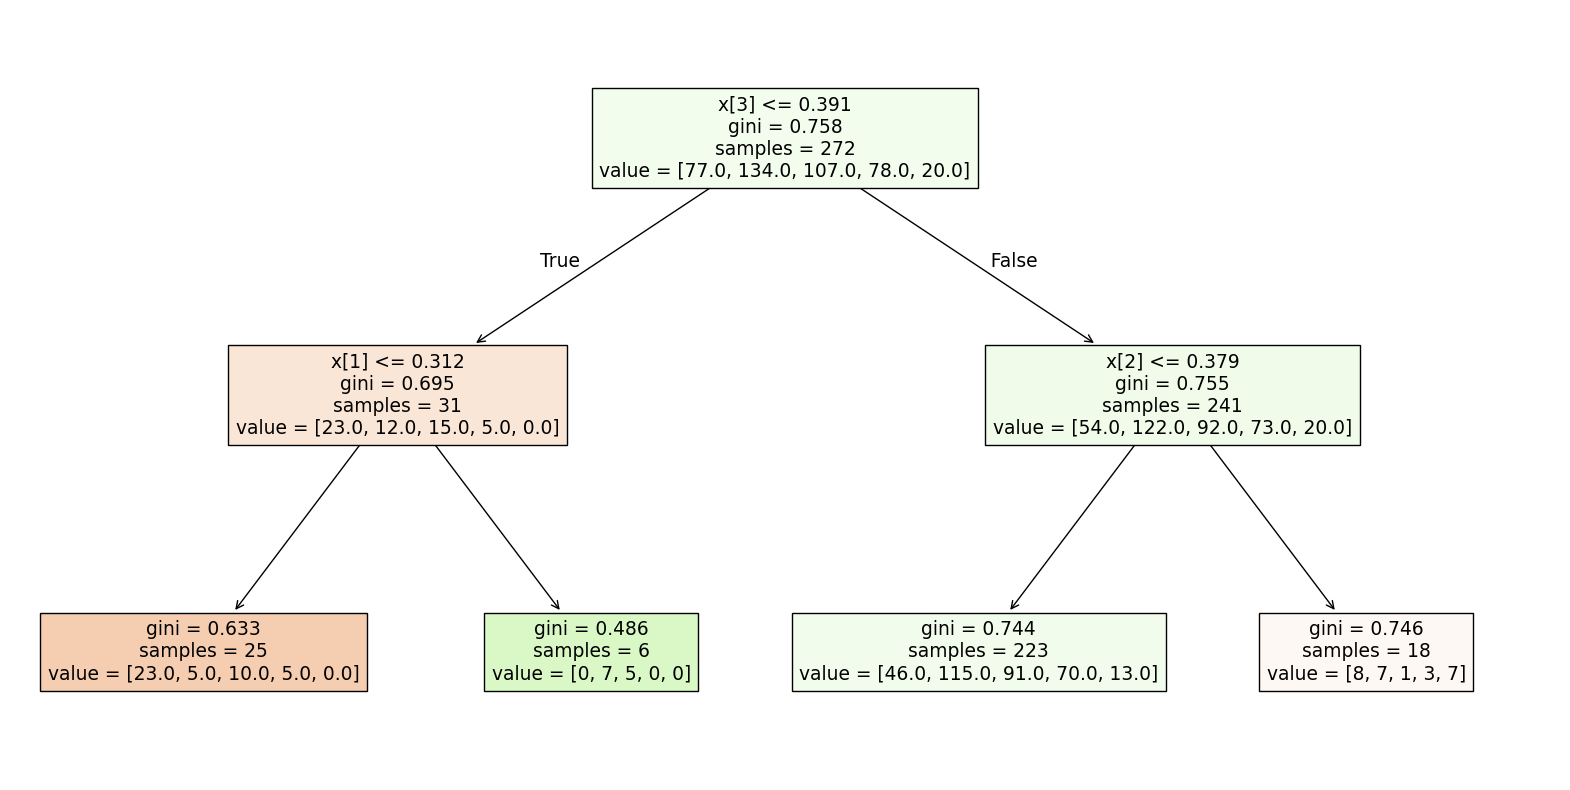

Accuracy:  0.38221153846153844
Précision:  0.5355718085106382
Recall:  0.38221153846153844
F1-score:  0.29217062743982924
Confusion Matrix:
 [[0.01201923 0.12740385 0.04567308 0.         0.        ]
 [0.         0.25721154 0.0625     0.         0.        ]
 [0.         0.14182692 0.11057692 0.         0.        ]
 [0.00480769 0.11298077 0.06971154 0.00240385 0.        ]
 [0.         0.03846154 0.01442308 0.         0.        ]]

Accuracy:  0.3619047619047619
Précision:  0.2153527223949759
Recall:  0.3619047619047619
F1-score:  0.2681179702482766
Confusion Matrix:
 [[0.         0.1047619  0.06666667 0.         0.        ]
 [0.         0.27619048 0.07619048 0.00952381 0.        ]
 [0.         0.16190476 0.08571429 0.         0.        ]
 [0.         0.07619048 0.05714286 0.         0.        ]
 [0.         0.05714286 0.02857143 0.         0.        ]]


/home/digit/miniconda3/envs/humour/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/digit/miniconda3/envs/humour/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [42]:
# Define the classifier
clf = RandomForestClassifier(class_weight='balanced')

# Define a grid of hyperparameters to search
param_grid = {
    'n_estimators': [5, 10, 20, 30, 40, 50, 100, 200, 300],           # number of trees
    'max_depth': [None, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 20],          # None means full depth
    'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70],      # minimum samples to split a node
}

# Setup grid search with 5-fold cross-validation
grid_search = GridSearchCV(clf, param_grid, cv=10, scoring='accuracy', n_jobs=-1)
grid_search.fit(x_train, y_train)

# Results
print("Best parameters:", grid_search.best_params_)
print("Best cross-validated accuracy:", grid_search.best_score_)

# Use the optimized model
clf = grid_search.best_estimator_






# Create and train the random forest (depth determined automatically)
#clf = RandomForestClassifier(max_depth=5)  # n_estimators is number of trees
clf.fit(x_train, y_train)

# Plot one of the trees in the forest for visualization
plt.figure(figsize=(20,10))
plot_tree(clf.estimators_[0], filled=True)  # Plot the first tree in the ensemble
plt.show()



y_pred_train = clf.predict(x_train)
metrics(y_train, y_pred_train)
print()
y_pred_test = clf.predict(x_test)
metrics(y_test, y_pred_test)

# WEKA

In [43]:
# Train Random Forest
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(x_train, y_train)

# Predict
y_pred = model.predict(x_test)

# Compute RRSE
numerator = np.sum((y_test - y_pred) ** 2)
denominator = np.sum((y_test - np.mean(y_test)) ** 2)
rrse = np.sqrt(numerator / denominator)

# Compute MSE and R²
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"RRSE: {rrse:.4f}")
print(f"MSE: {mse:.4f}")
print(f"R²: {r2:.4f}")


RRSE: 1.0172
MSE: 1.4111
R²: -0.0347


In [44]:
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# Train Random Forest
model = RandomForestRegressor(max_depth=5, n_estimators=20, random_state=42)
model.fit(x_train, y_train)

# TRAIN METRICS
print("TRAIN")
# Predict on train set
y_pred = model.predict(x_train)

# Compute RRSE
numerator = np.sum((y_train - y_pred) ** 2)
denominator = np.sum((y_train - np.mean(y_train)) ** 2)
rrse = np.sqrt(numerator / denominator)

# Compute MSE and R²
mse = mean_squared_error(y_train, y_pred)
r2 = r2_score(y_train, y_pred)

print(f"RRSE: {rrse:.4f}")
print(f"MSE: {mse:.4f}")
print(f"R²: {r2:.4f}")


# TEST METRICS
print()
print("TEST")
# Predict on test set
y_pred = model.predict(x_test)

# Compute RRSE
numerator = np.sum((y_test - y_pred) ** 2)
denominator = np.sum((y_test - np.mean(y_test)) ** 2)
rrse = np.sqrt(numerator / denominator)

# Compute MSE and R²
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"RRSE: {rrse:.4f}")
print(f"MSE: {mse:.4f}")
print(f"R²: {r2:.4f}")


TRAIN
RRSE: 0.8120
MSE: 0.8612
R²: 0.3406

TEST
RRSE: 1.0052
MSE: 1.3779
R²: -0.0103


# Regression

In [45]:
subset_df = human[['openai_symmetry', 'openai_compatibility', 'openai_obviousness', 'openai_comparison', 'average_score']].copy()
data = subset_df[['openai_symmetry', 'openai_compatibility', 'openai_obviousness', 'openai_comparison']] #0.615 0.628
target = subset_df['average_score']
x_train, x_test, y_train, y_test = train_test_split(data, target, test_size=0.2, shuffle=True, random_state=40)


# Create and train the model
model = LinearRegression()
model.fit(x_train, y_train)

# Predict
y_pred = model.predict(x_test)

# Evaluation
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)
print("Mean squared error:", mean_squared_error(y_test, y_pred))
print("R² score:", r2_score(y_test, y_pred))


Coefficients: [ 0.82899018 -1.25162856 -1.03572791  0.57716114]
Intercept: 2.763670448927244
Mean squared error: 0.3520604286769368
R² score: -0.03876075276436497
